In [17]:
import numpy as np
import scipy as sp
from numpy import linalg as nla
import matplotlib.pyplot as plt

In [18]:
def model(r):
    x=r[0]
    y=r[1]
    z=r[2]
    rho=0.3224
    delta=0.2625
    a=6.8927
    k=0.4032
    c=2.3952
    x1=1.0*(rho*delta*(x*x-a*x)+x*(x+y+c-c*np.tanh(x+z)))
    y1=-1.0*rho*delta*(a*y+x*x)
    z1=delta*(k-z-0.5*x)
    return (np.array([x1,y1,z1]))

In [19]:
def jac(r,g1):
    p=0.3224
    d=0.2625
    a=6.8927
    c=2.3952
    x=r[0]
    y=r[1]
    z=r[2]
    M=np.array([[-c*np.tanh(x + z) + c + d*p*(-a + 2*x) + x*(-c*(1 - np.tanh(x + z)**2) + 1) + x + y,x,-c*x*(1 - np.tanh(x + z)**2)],[-2*x*p*d,-p*d*a,0],[-d*0.5,0,-d]])
    res=np.matmul(M,g1)
    return(res)

In [20]:
g1=np.array([1,0,0])
g2=np.array([0,1,0])

In [ ]:
tmax=400
h=0.01
t=0
x=-3
y=0
z=0
r=np.array([x,y,z])
talp=0
valt=[]
vala=[]
while (t<=tmax):
    l1=jac(r,g1)
    l2=jac(r+0.5*h*l1,g1)
    l3=jac(r+0.5*h*l2,g1)
    l4=jac(r+h*l3,g1)
    
    g1=g1+(1.0/6)*h*(l1+2*l2+2*l3+l4)
    norm=np.sqrt(g1[0]**2+g1[1]**2+g1[2]**2)
    alp=np.log(norm)
    talp=talp+alp
    g1=g1/norm
    
    intern=(g2-np.dot(g2,g1)*g1)
    g2=intern/(np.sqrt(intern[0]**2+intern[1]**2+intern[2]**2))
    
    k1=model(r)
    k2=model(r+0.5*h*k1)
    k3=model(r+0.5*h*k2)
    k4=model(r+k3*h)
    t=t+h
    valt.append(t)
    vala.append(talp/t)
    r=r+(1.0/6)*h*(k1+2*k2+2*k3+k4)
print (talp/tmax)

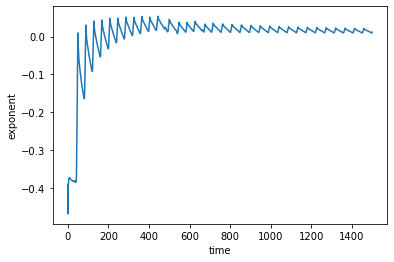

In [26]:
plt.plot(valt,vala)
plt.xlabel('time')
plt.ylabel('exponent')
plt.show()